In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import chi2_contingency


import numpy as np
from PIL import Image
import os
import cv2

# I - Exploration du Dataset

In [4]:
labels_df = pd.read_csv("training_labels.csv")
labels_df

,Image_id,Label
0,im-001,0
1,im-002,0
2,im-003,1
3,im-004,1
4,im-005,1
...,...,...
195,im-196,0
196,im-197,1
197,im-198,0
198,im-199,1


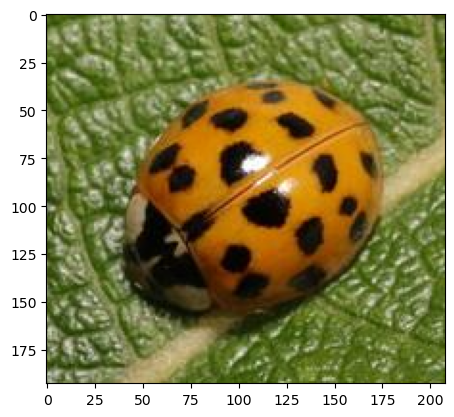

Click on the center of each spot. Press Enter when done.


/var/folders/sg/d_52nb_57s30gj20d0hs23bm0000gn/T/ipykernel_1148/568407705.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  spots = plt.ginput(n=-1)


Number of spots: 0


<Figure size 640x480 with 0 Axes>

In [7]:
# Load the image for a single ladybug
img_path = "training/im-004_im.png"
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.show()

# Allow the user to select points corresponding to the center of each spot
print("Click on the center of each spot. Press Enter when done.")
spots = plt.ginput(n=-1)

# Count the number of spots

num_spots = len(spots)
print(f"Number of spots: {num_spots}")

## 1. Comptage du nombre de Points sur la coccinnelle

__Étape__ : Nous procédons au comptage manuel du nombre de point présent sur l'image de la coccinnelle en question. On observe au fur et à mesure qu'il y a plusieurs images où le comptage peut être difficile ce qui explique une certaine approximation du nombre de point au niveau des coccinnelles à 5-7 points puis pour les coccinnelles à + de 8 points.

In [17]:
my_list = []
path = "path/to/img/folder/"
for i in labels_df['Image_id']:
    
    img = Image.open("training/" + i + "_im.png")
    img.show()

    # Ask the user to input a value
    value = input("Enter a value: ")

    # Add the value to a list

    my_list.append(value)
    

Enter a value:  5
Enter a value:  8
Enter a value:  18
Enter a value:  18
Enter a value:  17
Enter a value:  7
Enter a value:  6
Enter a value:  4
Enter a value:  17
Enter a value:  14
Enter a value:  7
Enter a value:  7
Enter a value:  18
Enter a value:  6
Enter a value:  7
Enter a value:  16
Enter a value:  17
Enter a value:  5
Enter a value:  4
Enter a value:  5
Enter a value:  5
Enter a value:  5
Enter a value:  19
Enter a value:  18
Enter a value:  4
Enter a value:  6
Enter a value:  12
Enter a value:  18
Enter a value:  2
Enter a value:  7
Enter a value:  5
Enter a value:  5
Enter a value:  8
Enter a value:  13
Enter a value:  6
Enter a value:  19
Enter a value:  16
Enter a value:  19
Enter a value:  15
Enter a value:  2
Enter a value:  6
Enter a value:  7
Enter a value:  14
Enter a value:  17
Enter a value:  16
Enter a value:  7
Enter a value:  2
Enter a value:  19
Enter a value:  14
Enter a value:  15
Enter a value:  10
Enter a value:  4
Enter a value:  4
Enter a value:  5
Ente

In [19]:
my_list

['5',
 '8',
 '18',
 '18',
 '17',
 '7',
 '6',
 '4',
 '17',
 '14',
 '7',
 '7',
 '18',
 '6',
 '7',
 '16',
 '17',
 '5',
 '4',
 '5',
 '5',
 '5',
 '19',
 '18',
 '4',
 '6',
 '12',
 '18',
 '2',
 '7',
 '5',
 '5',
 '8',
 '13',
 '6',
 '19',
 '16',
 '19',
 '15',
 '2',
 '6',
 '7',
 '14',
 '17',
 '16',
 '7',
 '2',
 '19',
 '14',
 '15',
 '10',
 '4',
 '4',
 '5',
 '19',
 '13',
 '4',
 '4',
 '18',
 '6',
 '7',
 '16',
 '6',
 '14',
 '12',
 '6',
 '7',
 '15',
 '14',
 '6',
 '7',
 '6',
 '16',
 '7',
 '7',
 '16',
 '7',
 '17',
 '7',
 '7',
 '15',
 '13',
 '15',
 '19',
 '5',
 '16',
 '18',
 '4',
 '15',
 '15',
 '14',
 '6',
 '6',
 '7',
 '16',
 '17',
 '5',
 '5',
 '5',
 '6',
 '7',
 '6',
 '19',
 '7',
 '6',
 '2',
 '7',
 '16',
 '6',
 '6',
 '15',
 '6',
 '5',
 '5',
 '15',
 '3',
 '7',
 '6',
 '6',
 '2',
 '4',
 '4',
 '7',
 '5',
 '7',
 '15',
 '6',
 '4',
 '7',
 '6',
 '15',
 '6',
 '7',
 '5',
 '5',
 '1',
 '14',
 '8',
 '17',
 '5',
 '18',
 '5',
 '15',
 '18',
 '5',
 '4',
 '15',
 '13',
 '12',
 '6',
 '2',
 '6',
 '16',
 '15',
 '7',
 '4',
 '

In [33]:
im_df = labels_df.copy()

In [38]:
im_df['ImageCount'] = labels_df['Image_id'].str.contains('im-', case=True)

In [39]:
im_df

,Image_id,Label,ImageCount
0,im-001,0,True
1,im-002,0,True
2,im-003,1,True
3,im-004,1,True
4,im-005,1,True
...,...,...,...
195,im-196,0,True
196,im-197,1,True
197,im-198,0,True
198,im-199,1,True


__Remarque__ : On assimile notre résultat (ici la liste contenant toutes les valeurs du nombre de point de chaque coccinnelle) à une nouvelle colonne au nom de "ImageCount" 

In [41]:
im_df['ImageCount'] = np.array(my_list)
im_df

,Image_id,Label,ImageCount
0,im-001,0,5
1,im-002,0,8
2,im-003,1,18
3,im-004,1,18
4,im-005,1,17
...,...,...,...
195,im-196,0,7
196,im-197,1,3
197,im-198,0,5
198,im-199,1,4


In [43]:
im_df.to_csv('spot_counting.csv', encoding='utf-8')

In [10]:
spot_counting = pd.read_csv("spot_counting.csv", index_col=False)
spot_counting

spot_counting = spot_counting.drop(spot_counting.columns[0], axis=1)
spot_counting

,Image_id,Label,ImageCount
0,im-001,0,5
1,im-002,0,8
2,im-003,1,18
3,im-004,1,18
4,im-005,1,17
...,...,...,...
195,im-196,0,7
196,im-197,1,3
197,im-198,0,5
198,im-199,1,4


## 2. Création d'une colonne "Class"

__Étape__ Cette dernière va nous permettre de distinguer plus facilement à quelle classe la coccinnelle appartient. Ainsi on s'appuie sur la colonne numérique déjà existante ("Label" contenant que des 0 ou des 1) pour la création de notre colonne "Class".

In [29]:
spot_counting['Class'] = spot_counting['Label'].apply(lambda x: 'Coccinella septempunctata' if x == 0 else 'Harmonia axyridis')
spot_counting

,Image_id,Label,ImageCount,Class
0,im-001,0,5,Coccinella septempunctata
1,im-002,0,8,Coccinella septempunctata
2,im-003,1,18,Harmonia axyridis
3,im-004,1,18,Harmonia axyridis
4,im-005,1,17,Harmonia axyridis
...,...,...,...,...
195,im-196,0,7,Coccinella septempunctata
196,im-197,1,3,Harmonia axyridis
197,im-198,0,5,Coccinella septempunctata
198,im-199,1,4,Harmonia axyridis


In [31]:
spot_counting.to_csv('cocci_df.csv', encoding='utf-8')

In [3]:
cocci_df= pd.read_csv("cocci_df.csv")
cocci_df = cocci_df.drop(cocci_df.columns[0], axis=1)
cocci_df

,Image_id,Label,ImageCount,Class
0,im-001,0,5,Coccinella septempunctata
1,im-002,0,8,Coccinella septempunctata
2,im-003,1,18,Harmonia axyridis
3,im-004,1,18,Harmonia axyridis
4,im-005,1,17,Harmonia axyridis
...,...,...,...,...
195,im-196,0,7,Coccinella septempunctata
196,im-197,1,3,Harmonia axyridis
197,im-198,0,5,Coccinella septempunctata
198,im-199,1,4,Harmonia axyridis


## 3. Création d'une colonne "CountInt"

__Étape__ : On définit cette colonne en prenant appui de la colonne "ImageCount" afin d'avoir une vue plus globale sur les valeurs prises dans cette colonne. On met en évidence ici 3 grands groupes d'intervalles : de 1 à 4, 5 à 8,  puis > 8.


In [4]:
def int_Count(ImageCount):
    if ImageCount <= 4 :
        return "1-4"
    elif (ImageCount > 4) & (ImageCount <= 7):
        return "5-8"
    else:
        return "8+"
 

In [5]:
cocci_df['CountInt'] = cocci_df['ImageCount'].apply(int_Count)
cocci_df

,Image_id,Label,ImageCount,Class,CountInt
0,im-001,0,5,Coccinella septempunctata,5-8
1,im-002,0,8,Coccinella septempunctata,5-8
2,im-003,1,18,Harmonia axyridis,9+
3,im-004,1,18,Harmonia axyridis,9+
4,im-005,1,17,Harmonia axyridis,9+
...,...,...,...,...,...
195,im-196,0,7,Coccinella septempunctata,5-8
196,im-197,1,3,Harmonia axyridis,1-4
197,im-198,0,5,Coccinella septempunctata,5-8
198,im-199,1,4,Harmonia axyridis,1-4


In [6]:
cocci_df.to_csv('new_df.csv')

In [12]:
new_df= pd.read_csv("new_df.csv")
new_df = new_df.drop(new_df.columns[0], axis=1)
new_df = new_df[['Image_id', 'Label', 'Class', 'ImageCount', 'CountInt']]
new_df

,Image_id,Label,Class,ImageCount,CountInt
0,im-001,0,Coccinella septempunctata,5,5-8
1,im-002,0,Coccinella septempunctata,8,5-8
2,im-003,1,Harmonia axyridis,18,9+
3,im-004,1,Harmonia axyridis,18,9+
4,im-005,1,Harmonia axyridis,17,9+
...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-8
196,im-197,1,Harmonia axyridis,3,1-4
197,im-198,0,Coccinella septempunctata,5,5-8
198,im-199,1,Harmonia axyridis,4,1-4


## 4. Création de deux autres colonnes "ElytraColor", et "SpotColor"

__Étape__ : De la même façon que précédemment, on y relève la couleur correspondant aux élytres de la coccinnelle, puis de la couleur des points qui lui sont associés. D'où la création des colonnes sur la couleur des Élytres dans un premier temps, puis celle sur la couleur des Points dans un second temps.

In [25]:
new_df['ImageCount'].loc[new_df['Image_id'] == "im-001"]

0    5
Name: ImageCount, dtype: int64

In [27]:
skinColor_list = []
spotColor_list = []


path = "path/to/img/folder/"
for i in new_df['Image_id']:
    
    img = Image.open("training/" + i + "_im.png")
    img.show()

    # Ask the user to input a value
    print(f"This ladybug's class is : {new_df['Class'].loc[new_df['Image_id'] == i]} ")
    skin_color = input("Enter the color of the Skin: ")
    spot_color = input("Enter the color of the Spot: ")

    # Add the value to a list

    skinColor_list.append(skin_color)
    spotColor_list.append(spot_color)
    

This ladybug's class is : 0    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 1    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 2    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 3    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 4    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 5    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 6    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 7    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 8    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 9    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 10    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 11    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 12    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 13    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 14    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 15    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 16    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 17    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 18    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 19    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 20    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 21    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 22    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 23    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 24    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 25    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 26    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 27    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 28    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 29    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 30    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 31    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 32    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 33    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 34    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 35    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 36    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 37    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 38    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 39    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 40    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 41    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 42    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 43    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 44    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 45    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 46    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 47    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 48    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 49    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 50    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 51    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 52    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 53    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 54    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 55    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 56    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 57    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 58    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 59    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 60    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 61    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 62    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 63    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 64    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 65    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 66    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 67    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 68    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 69    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 70    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 71    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 72    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 73    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 74    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 75    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 76    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 77    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 78    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 79    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 80    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 81    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 82    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 83    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 84    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 85    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 86    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 87    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 88    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 89    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 90    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 91    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 92    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 93    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 94    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 95    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 96    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 97    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 98    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 99    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 100    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 101    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 102    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 103    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 104    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 105    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 106    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 107    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 108    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 109    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 110    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 111    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 112    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 113    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 114    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 115    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 116    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 117    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 118    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 119    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 120    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 121    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 122    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 123    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 124    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 125    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 126    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 127    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 128    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 129    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 130    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 131    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 132    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 133    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 134    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 135    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 136    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 137    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 138    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 139    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 140    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 141    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 142    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 143    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 144    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 145    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 146    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 147    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 148    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 149    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 150    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  Y


This ladybug's class is : 151    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 152    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 153    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 154    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 155    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 156    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 157    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 158    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 159    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 160    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 161    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 162    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 163    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 164    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 165    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 166    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 167    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 168    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 169    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 170    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 171    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 172    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 173    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 174    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 175    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 176    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  Y
Enter the color of the Spot:  B


This ladybug's class is : 177    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 178    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 179    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 180    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 181    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 182    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 183    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 184    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 185    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 186    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 187    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 188    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 189    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 190    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 191    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 192    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 193    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  O
Enter the color of the Spot:  B


This ladybug's class is : 194    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 195    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 196    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  R


This ladybug's class is : 197    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


This ladybug's class is : 198    Harmonia axyridis
Name: Class, dtype: object 


Enter the color of the Skin:  B
Enter the color of the Spot:  O


This ladybug's class is : 199    Coccinella septempunctata
Name: Class, dtype: object 


Enter the color of the Skin:  R
Enter the color of the Spot:  B


In [53]:
new_df['ElytraColor'] = np.array(skinColor_list)
new_df['SpotColor'] = np.array(spotColor_list)
new_df

,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor
0,im-001,0,Coccinella septempunctata,5,5-8,O,B
1,im-002,0,Coccinella septempunctata,8,5-8,O,B
2,im-003,1,Harmonia axyridis,18,9+,R,B
3,im-004,1,Harmonia axyridis,18,9+,O,B
4,im-005,1,Harmonia axyridis,17,9+,R,B
...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-8,R,B
196,im-197,1,Harmonia axyridis,3,1-4,B,R
197,im-198,0,Coccinella septempunctata,5,5-8,R,B
198,im-199,1,Harmonia axyridis,4,1-4,B,O


In [54]:
def function_color(ElytraColor):
    if ElytraColor == "O":
        return "Orange"
    elif ElytraColor == "R":
        return "Red"
    elif ElytraColor == "B":
        return "Black"
    elif ElytraColor =="Y":
        return "Yellow"
    else:
        return ElytraColor

In [55]:
new_df['ElytraColor'] = new_df['ElytraColor'].apply(function_color)
new_df['SpotColor'] = new_df['SpotColor'].apply(function_color)
new_df

,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor
0,im-001,0,Coccinella septempunctata,5,5-8,Orange,Black
1,im-002,0,Coccinella septempunctata,8,5-8,Orange,Black
2,im-003,1,Harmonia axyridis,18,9+,Red,Black
3,im-004,1,Harmonia axyridis,18,9+,Orange,Black
4,im-005,1,Harmonia axyridis,17,9+,Red,Black
...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-8,Red,Black
196,im-197,1,Harmonia axyridis,3,1-4,Black,Red
197,im-198,0,Coccinella septempunctata,5,5-8,Red,Black
198,im-199,1,Harmonia axyridis,4,1-4,Black,Orange


In [63]:
def count_Color(x):
    if x == "Black":
        return 0
    elif x == "Red":
        return 1
    elif x == "Orange":
        return 2
    elif x =="Yellow":
        return 3
    else:
        return ""

In [65]:
new_df['ElytraFloat'] = new_df['ElytraColor'].apply(count_Color)
new_df['SpotFloat'] = new_df['SpotColor'].apply(count_Color)
new_df


,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,0,Coccinella septempunctata,5,5-8,Orange,Black,2,0
1,im-002,0,Coccinella septempunctata,8,5-8,Orange,Black,2,0
2,im-003,1,Harmonia axyridis,18,9+,Red,Black,1,0
3,im-004,1,Harmonia axyridis,18,9+,Orange,Black,2,0
4,im-005,1,Harmonia axyridis,17,9+,Red,Black,1,0
...,...,...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-8,Red,Black,1,0
196,im-197,1,Harmonia axyridis,3,1-4,Black,Red,0,1
197,im-198,0,Coccinella septempunctata,5,5-8,Red,Black,1,0
198,im-199,1,Harmonia axyridis,4,1-4,Black,Orange,0,2


In [83]:
new_df.to_csv('df_features.csv')

## 5. Premières Viusalisations de nos données

__Étape__ : Depuis les attributs qu'on a construit précédemment, on en affiche différentes visualisations afin d'en tirer des premières observations sur nos données

In [73]:
df_features= pd.read_csv("df_features.csv")
df_features = new_df.drop(df_features.columns[0], axis=1)

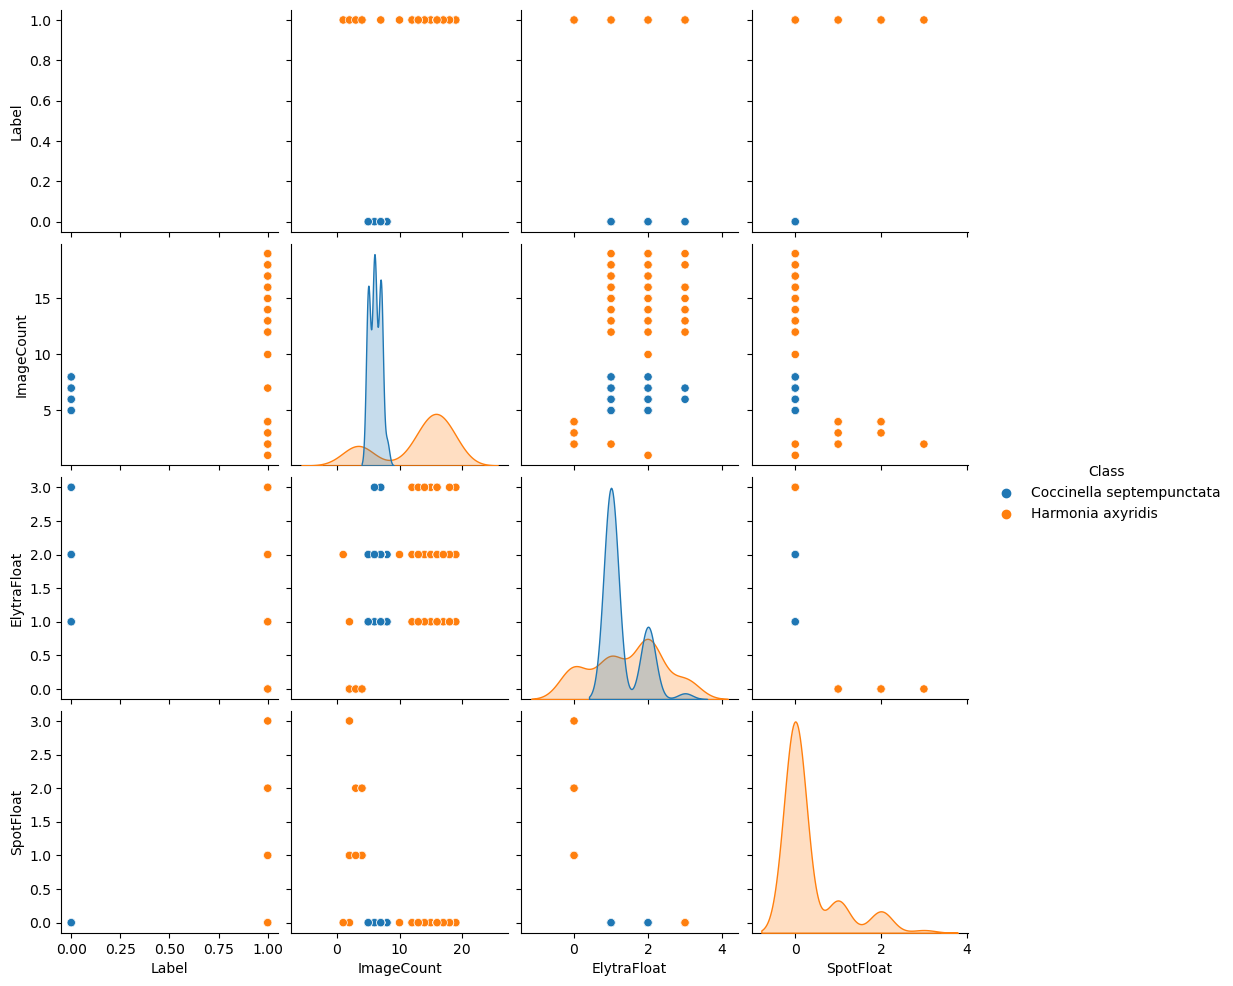

In [66]:
sns.pairplot(new_df, hue="Class");

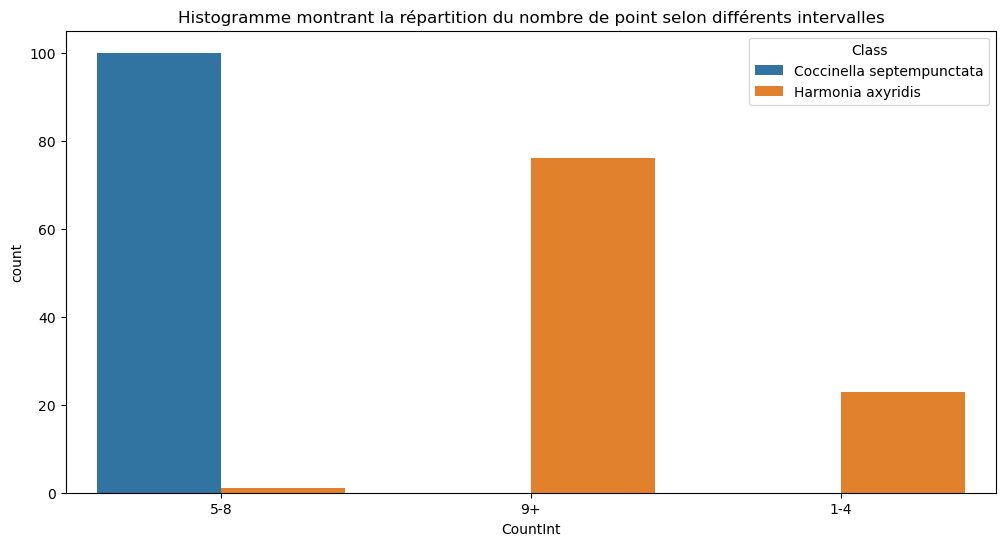

In [67]:
fig, axes = plt.subplots(figsize=(12,6))
sns.countplot(data = new_df, x = "CountInt", hue = "Class")
plt.title("Histogramme montrant la répartition du nombre de point selon différents intervalles", fontdict=None, loc=None, pad=None)
plt.show()

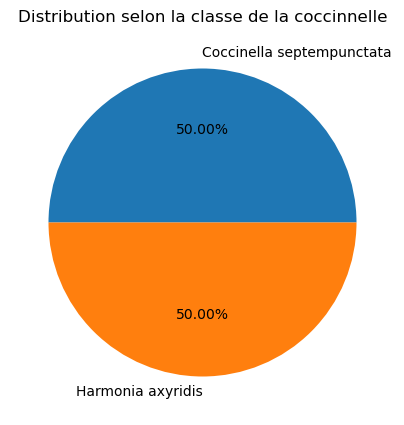

In [68]:
Class_nbr=new_df['Class'].value_counts()
Class_nbr.plot.pie(y='Class', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la classe de la coccinnelle')
plt.show()

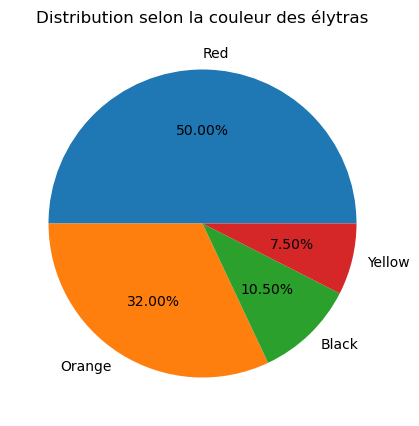

In [69]:
Elytra_color=new_df['ElytraColor'].value_counts()
Elytra_color.plot.pie(y='ElytraColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des élytras')
plt.show()

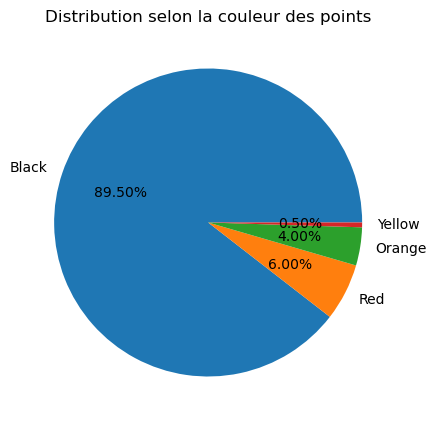

In [77]:
Spot_color=new_df['SpotColor'].value_counts()
Spot_color.plot.pie(y='SpotColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des points')
plt.show()

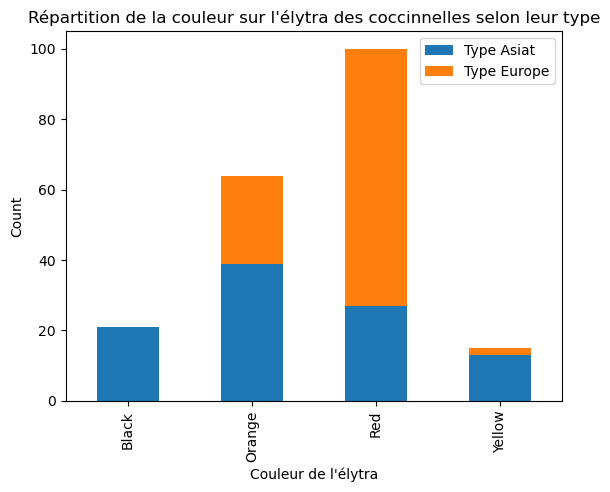

In [71]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = new_df[new_df['Label'] == 1]['ElytraColor'].value_counts()
Europe = new_df[new_df['Label'] == 0]['ElytraColor'].value_counts()
elytra_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
elytra_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur sur l'élytra des coccinnelles selon leur type")
plt.xlabel("Couleur de l'élytra")
plt.ylabel("Count")
plt.show()


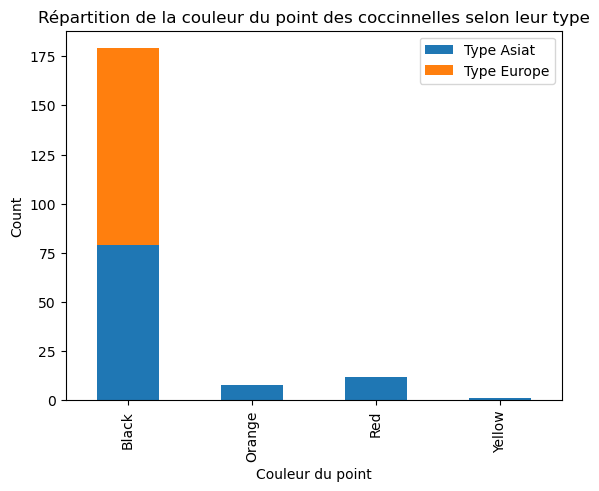

In [72]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = new_df[new_df['Label'] == 1]['SpotColor'].value_counts()
Europe = new_df[new_df['Label'] == 0]['SpotColor'].value_counts()
spot_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
spot_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur du point des coccinnelles selon leur type")
plt.xlabel("Couleur du point")
plt.ylabel("Count")
plt.show()


## 6. Répartition de nos images selon leur classe

__Étape__ : On procède à la création d'un dataset qui réparti les images selon leur classe (200 lignes pour les 200 images, 2 colonnes pour les 2 classes)

In [75]:
asiat_im = new_df[new_df['Label'] == 1]['Image_id']
europe_im = new_df[new_df['Label'] == 0]['Image_id']
im_repartition = pd.DataFrame({'Image EUR': europe_im, 'Image ASIAT': asiat_im})
im_repartition

,Image EUR,Image ASIAT
0,im-001,NaN
1,im-002,NaN
2,NaN,im-003
3,NaN,im-004
4,NaN,im-005
...,...,...
195,im-196,NaN
196,NaN,im-197
197,im-198,NaN
198,NaN,im-199


## 7. Correction de nos données

__Étape__ : On apprend que les types européennes n'ont que 7 points au maximum. Ce qui montre que certaines de nos données rentrées manuellement, sont fausses (car de label 0 et ont parfois 8 points après comptage). Ce qui montre l'imprécision de notre comptage. On parvient à corriger ces phénomènes en associant la valeur 7 pour toutes valeurs (ImageCount) qui dépasseraient ce seuil pour les coccinnelles de classe Européenne. D'où correction également sur l'intervalle " 5-8 " à " 5-7 ".

In [76]:
im_repartition.to_csv('repartition_image.csv')

In [87]:
df_features= pd.read_csv("df_features.csv")
df_features = df_features.drop(df_features.columns[0], axis=1)
df_features

,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,0,Coccinella septempunctata,5,5-8,Orange,Black,2,0
1,im-002,0,Coccinella septempunctata,7,5-8,Orange,Black,2,0
2,im-003,1,Harmonia axyridis,18,9+,Red,Black,1,0
3,im-004,1,Harmonia axyridis,18,9+,Orange,Black,2,0
4,im-005,1,Harmonia axyridis,17,9+,Red,Black,1,0
...,...,...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-8,Red,Black,1,0
196,im-197,1,Harmonia axyridis,3,1-4,Black,Red,0,1
197,im-198,0,Coccinella septempunctata,5,5-8,Red,Black,1,0
198,im-199,1,Harmonia axyridis,4,1-4,Black,Orange,0,2


In [89]:
df_features['CountInt'].loc[df_features['CountInt'] == "5-8"] = "5-7"
df_features['CountInt'].loc[df_features['CountInt'] == "9+"] = "8+"

df_features

/var/folders/sg/d_52nb_57s30gj20d0hs23bm0000gn/T/ipykernel_1546/2916293277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['CountInt'].loc[df_features['CountInt'] == "5-8"] = "5-7"
/var/folders/sg/d_52nb_57s30gj20d0hs23bm0000gn/T/ipykernel_1546/2916293277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['CountInt'].loc[df_features['CountInt'] == "9+"] = "8+"


,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,0,Coccinella septempunctata,5,5-7,Orange,Black,2,0
1,im-002,0,Coccinella septempunctata,7,5-7,Orange,Black,2,0
2,im-003,1,Harmonia axyridis,18,8+,Red,Black,1,0
3,im-004,1,Harmonia axyridis,18,8+,Orange,Black,2,0
4,im-005,1,Harmonia axyridis,17,8+,Red,Black,1,0
...,...,...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-7,Red,Black,1,0
196,im-197,1,Harmonia axyridis,3,1-4,Black,Red,0,1
197,im-198,0,Coccinella septempunctata,5,5-7,Red,Black,1,0
198,im-199,1,Harmonia axyridis,4,1-4,Black,Orange,0,2


In [90]:
df_features.to_csv('final_df.csv')

## 8. Visualisation récapitulatif de nos données sur toutes nos features

__Étapes__ : On utilise pour cela une visualisation récapitulatif de nos features

In [3]:
final_df= pd.read_csv("final_df.csv")
final_df = final_df.drop(final_df.columns[0], axis=1)
final_df

,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,0,Coccinella septempunctata,5,5-7,Orange,Black,2,0
1,im-002,0,Coccinella septempunctata,7,5-7,Orange,Black,2,0
2,im-003,1,Harmonia axyridis,18,8+,Red,Black,1,0
3,im-004,1,Harmonia axyridis,18,8+,Orange,Black,2,0
4,im-005,1,Harmonia axyridis,17,8+,Red,Black,1,0
...,...,...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-7,Red,Black,1,0
196,im-197,1,Harmonia axyridis,3,1-4,Black,Red,0,1
197,im-198,0,Coccinella septempunctata,5,5-7,Red,Black,1,0
198,im-199,1,Harmonia axyridis,4,1-4,Black,Orange,0,2


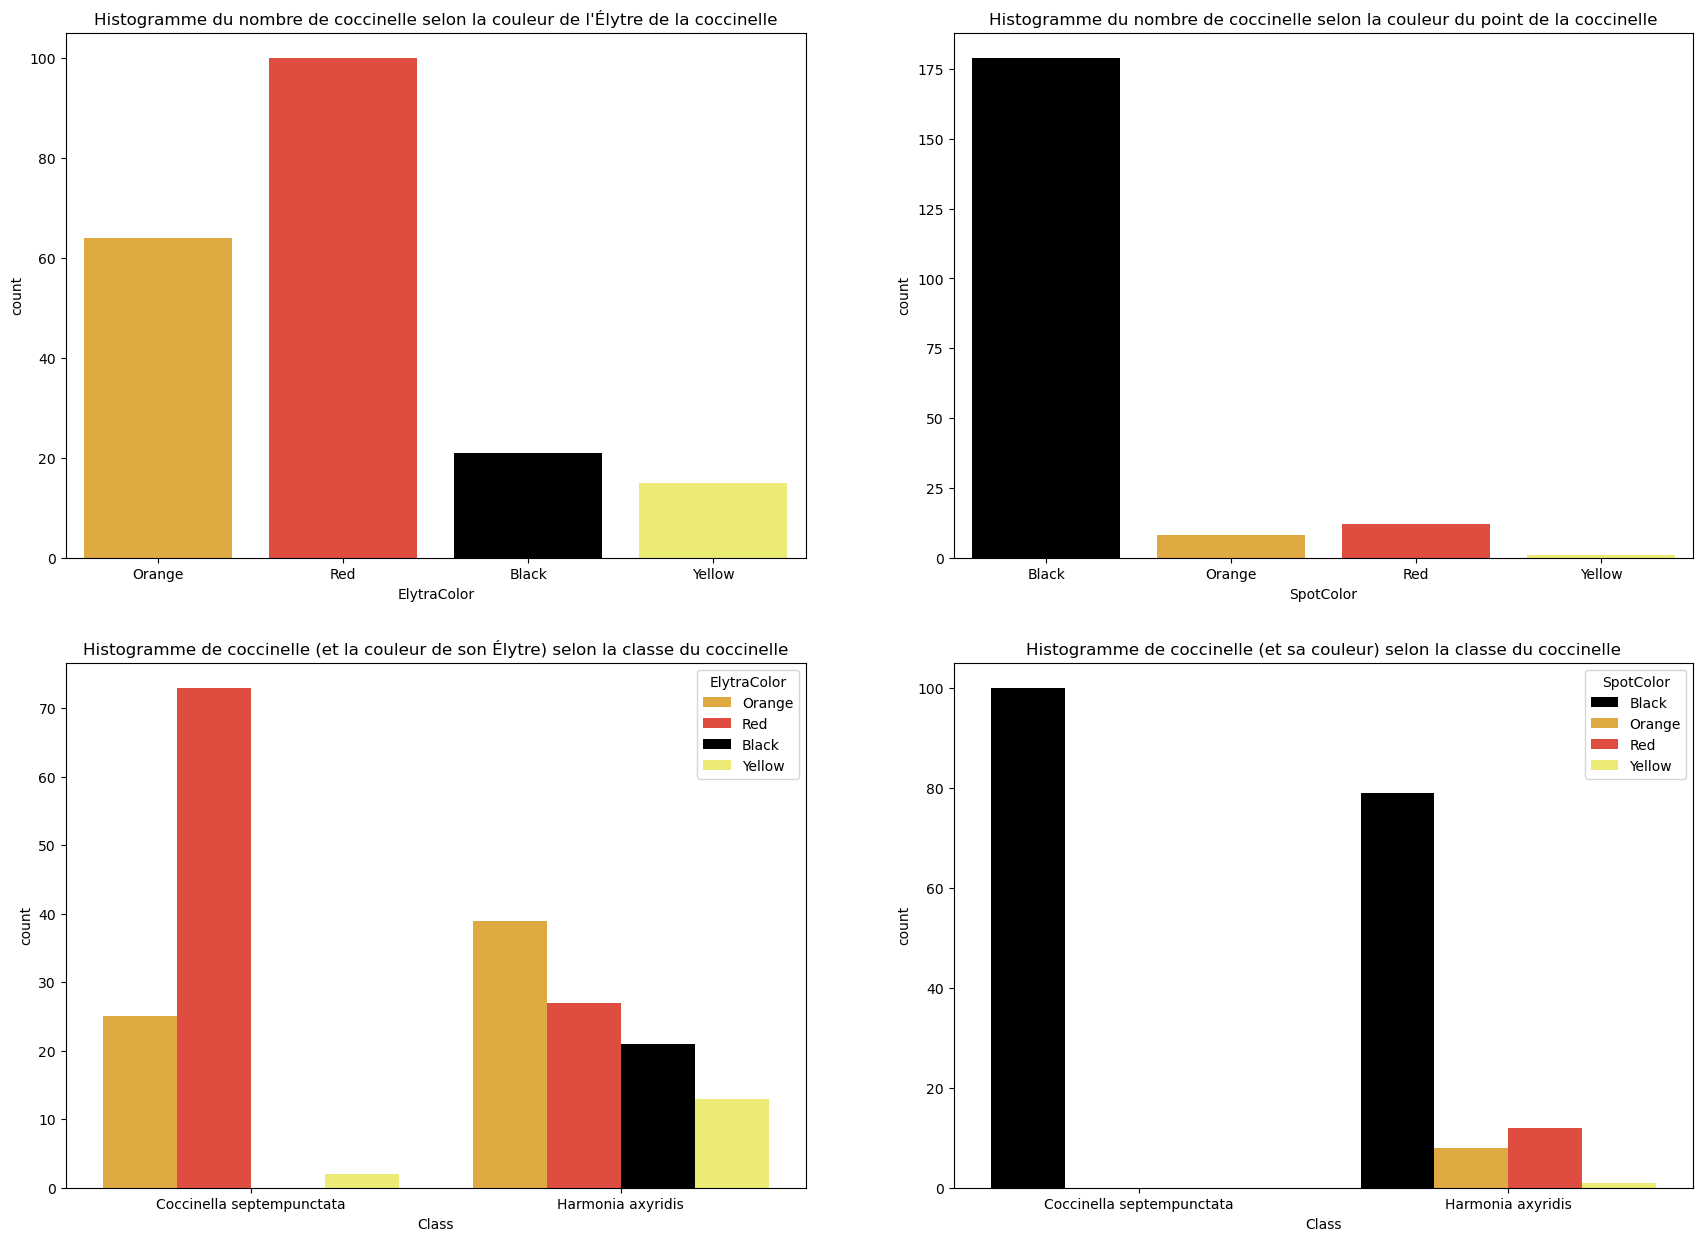

In [35]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.countplot(data=final_df, ax=axes[0][0], x="ElytraColor",palette=palette ).set(title="Histogramme du nombre de coccinelle selon la couleur de l'Élytre de la coccinelle")
sns.countplot(data=final_df, ax=axes[0][1], x="SpotColor", palette=palette).set(title='Histogramme du nombre de coccinelle selon la couleur du point de la coccinelle')
sns.countplot(data=final_df, ax=axes[1][0], x="Class", hue = "ElytraColor", palette=palette).set(title='Histogramme de coccinelle (et la couleur de son Élytre) selon la classe du coccinelle')
sns.countplot(data=final_df, ax=axes[1][1], x="Class",hue = "SpotColor", palette = palette).set(title='Histogramme de coccinelle (et sa couleur) selon la classe du coccinelle')






plt.show()

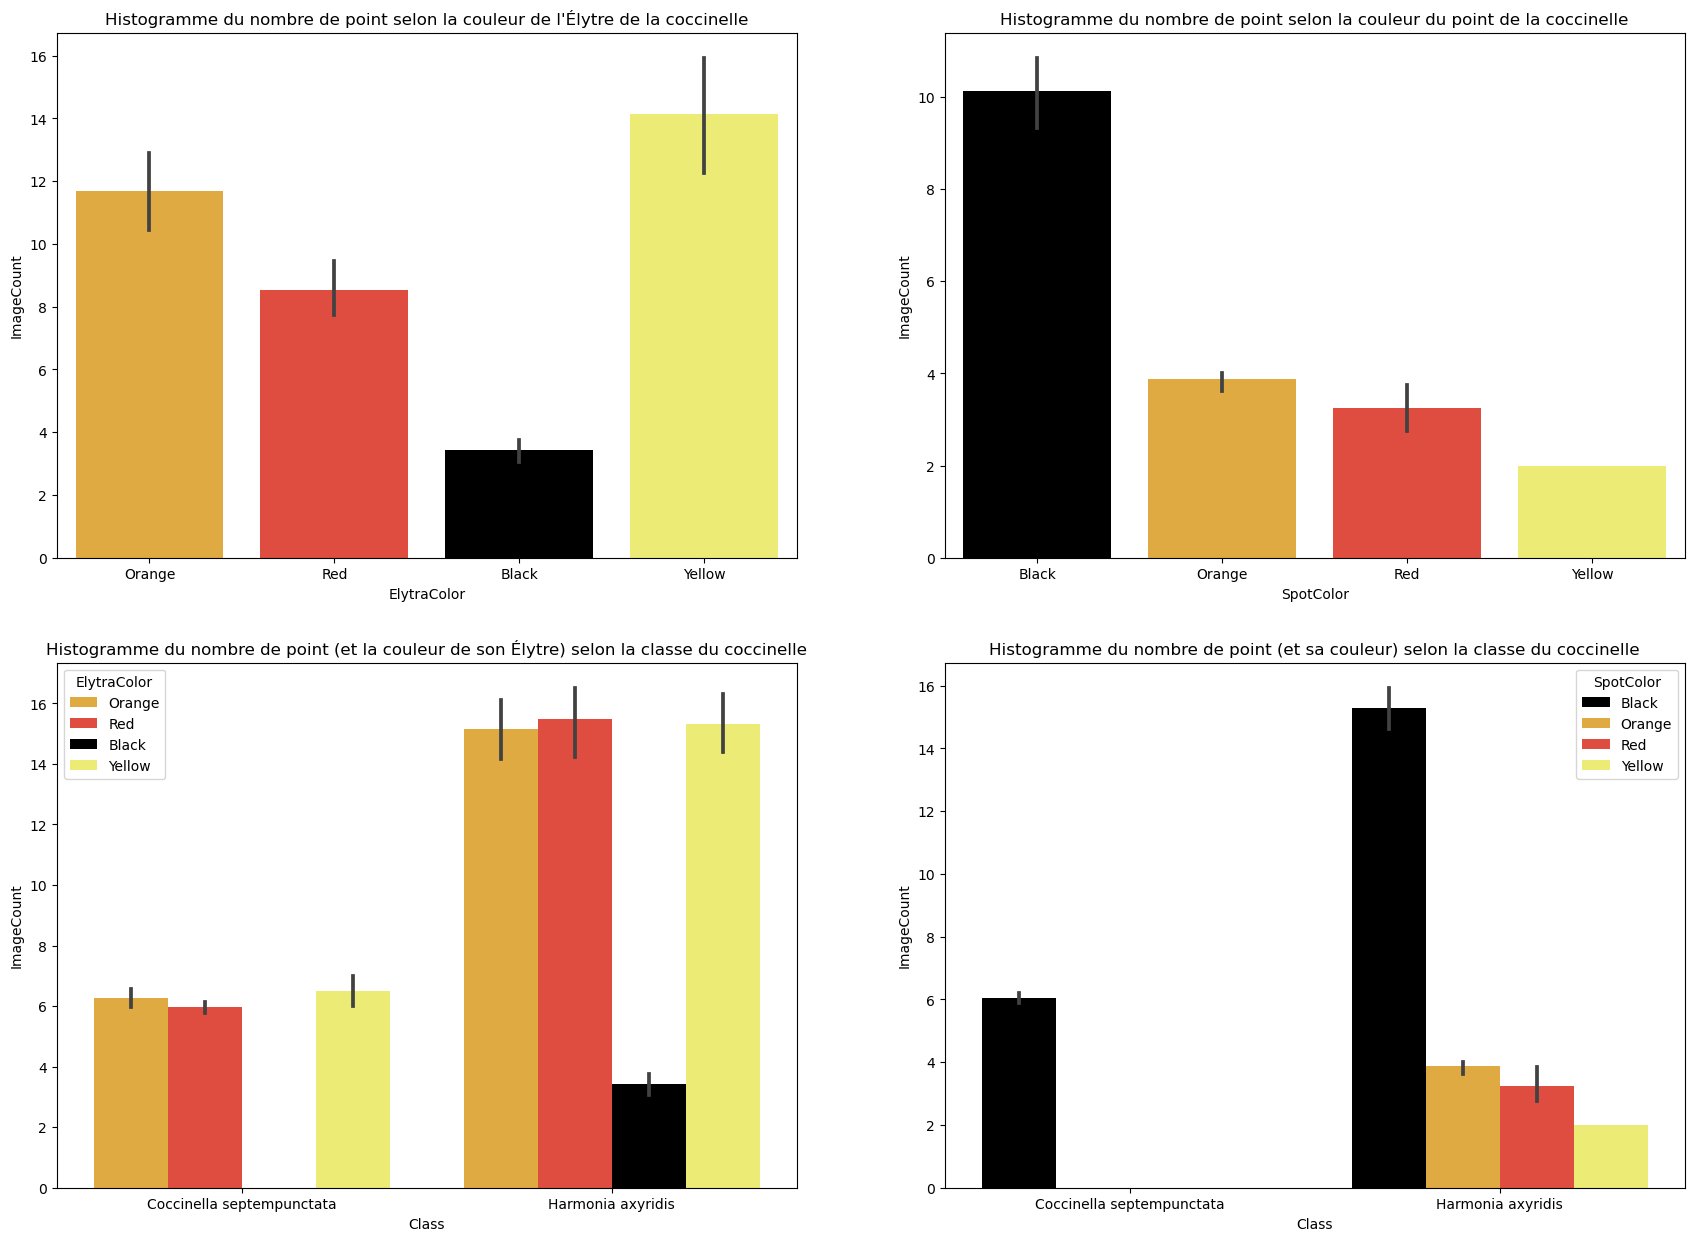

In [33]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.barplot(data=final_df, ax=axes[0][0], x="ElytraColor", y="ImageCount" ,palette=palette).set(title="Histogramme du nombre de point selon la couleur de l'Élytre de la coccinelle")
sns.barplot(data=final_df, ax=axes[0][1], x="SpotColor", y="ImageCount", palette=palette).set(title='Histogramme du nombre de point selon la couleur du point de la coccinelle')
sns.barplot(data=final_df, ax=axes[1][0], x="Class", y="ImageCount", hue = "ElytraColor", palette=palette).set(title='Histogramme du nombre de point (et la couleur de son Élytre) selon la classe du coccinelle')
sns.barplot(data=final_df, ax=axes[1][1], x="Class", y="ImageCount", hue = "SpotColor", palette = palette).set(title='Histogramme du nombre de point (et sa couleur) selon la classe du coccinelle')






plt.show()

## 9. Exploitation de nos données

__Étape__ : Sous forme de tableau croisé, on met en évidence les différentes proportions de coccinnelles pour chaque features. On y voit la répartition de l'effectif total des coccinnelles.

In [42]:
final_df

,Image_id,Label,Class,ImageCount,CountInt,ElytraColor,SpotColor,ElytraFloat,SpotFloat
0,im-001,0,Coccinella septempunctata,5,5-7,Orange,Black,2,0
1,im-002,0,Coccinella septempunctata,7,5-7,Orange,Black,2,0
2,im-003,1,Harmonia axyridis,18,8+,Red,Black,1,0
3,im-004,1,Harmonia axyridis,18,8+,Orange,Black,2,0
4,im-005,1,Harmonia axyridis,17,8+,Red,Black,1,0
...,...,...,...,...,...,...,...,...,...
195,im-196,0,Coccinella septempunctata,7,5-7,Red,Black,1,0
196,im-197,1,Harmonia axyridis,3,1-4,Black,Red,0,1
197,im-198,0,Coccinella septempunctata,5,5-7,Red,Black,1,0
198,im-199,1,Harmonia axyridis,4,1-4,Black,Orange,0,2


In [56]:
def degree_of_freedom (df):
    degf2 = (df.shape[0] - 1 ) * (df.shape[1] - 1)
    return degf2


In [61]:
def cramer_v(df):
    n = df.sum().sum()
    chi2 = chi2_contingency(df, correction = False)[0]
    res = np.sqrt(chi2 / (n*(min(df.shape)-1)))
    return res


In [63]:

df_crosstab1 = pd.crosstab(final_df['CountInt'], final_df['Class'], rownames = ['CountInt'], colnames = ['Class'])



print(f"Il y a un total de {degree_of_freedom(df_crosstab1)} degrés de liberté")
df_crosstab1

Il y a un total de 2 degrés de liberté


Class,Coccinella septempunctata,Harmonia axyridis
CountInt,,
1-4,0,23
5-7,100,1
8+,0,76


In [64]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab1)}")
    

Chi2 est égale à 196.03960396039605 
p-value : 2.6948890065142123e-43 
Le coefficient de Cramer donne 0.9900495037128094


__Remarque__ : On rejète dans un premier temps l'hypothèse H0, on en déduit que les variables (Classe de la coccinelle et le nombre de point) ne sont pas indépendantes. De plus, comme le coefficient de Cramer est très important. On en conclut qu'il existe une relation de corrélation très significative entre les deux variables. Et qu'il sera possible de prédire l'une des variables par rapport à l'autre.

In [65]:

df_crosstab2 = pd.crosstab(final_df['ElytraColor'], final_df['Class'], rownames = ['ElytraColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab2)} degrés de liberté")
df_crosstab2

Il y a un total de 3 degrés de liberté


Class,Coccinella septempunctata,Harmonia axyridis
ElytraColor,,
Black,0,21
Orange,25,39
Red,73,27
Yellow,2,13


In [66]:

chi2, p, degf, ex = chi2_contingency(df_crosstab2)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab2)}")
    

Chi2 est égale à 53.28916666666667 
p-value : 1.5907277768164958e-11 
Le coefficient de Cramer donne 0.5161839142527916


__Remarque__ : On rejète également l'hypothèse H0. On en déduit que la classe de la coccinelle et que la couleur des Élytres ne sont pas indépendantes. Par ailleurs, la coefficient de Cramer étant supérieur à 0.5. On peut considérer la relation de corrélation comme étant significatif également.

In [67]:

df_crosstab3 = pd.crosstab(final_df['SpotColor'], final_df['Class'], rownames = ['SpotColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab3)} degrés de liberté")
df_crosstab3

Il y a un total de 3 degrés de liberté


Class,Coccinella septempunctata,Harmonia axyridis
SpotColor,,
Black,100,79
Orange,0,8
Red,0,12
Yellow,0,1


In [68]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab3)}")
    

Chi2 est égale à 196.03960396039605 
p-value : 2.6948890065142123e-43 
Le coefficient de Cramer donne 0.34251778896020857


__Remarque__ : Ici l'hypothèse H0 est également rejeté. On en déduit que les variables "*SpotColor*" et "*Class*" ne sont pas indépendantes. Cela dit, étant donné que le coefficient de Cramer est inférieur à 0.5. Ainsi on ne peut pas évoquer de relation de corrélation entre ces deux variables, contrairement aux 2 cas précédents.

## 10. Exploitation des images segmentées

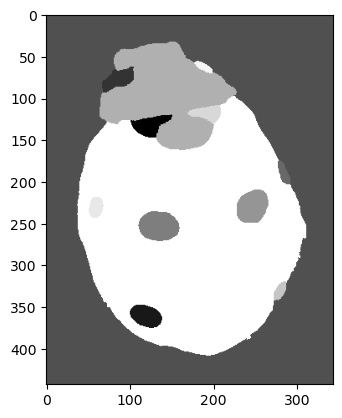

In [2]:
# Importer la bibliothèque PIL et Matplotlib
from PIL import Image
import matplotlib.pyplot as plt

# Ouvrir l'image 'im-002_seg.png' avec la bibliothèque PIL et la convertir en niveaux de gris
image = Image.open('training/im-002_seg.png').convert("L")

# Afficher l'image à l'aide de Matplotlib avec un color mapping en niveaux de gris
plt.imshow(image,cmap="Greys")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import webcolors

 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

 

image = cv2.imread('training/im-002_im.png') # Loading image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR)
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

 

 

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 8 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 20, cv2.KMEANS_RANDOM_CENTERS)


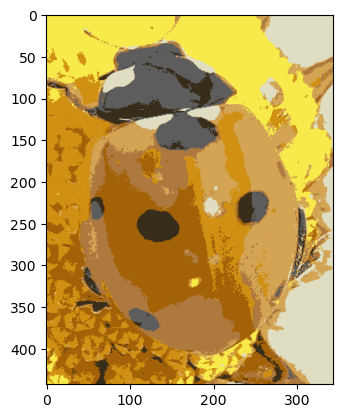

In [4]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
plt.imshow(segmented_image)

In [5]:


def drawpie(labels,centers):
    
    labels=list(labels)
    percent=[]
    for i in range(len(centers)):
        
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
      
    plt.pie(percent,colors=np.array(centers/255),labels=np.arange(len(centers)))
    plt.show()


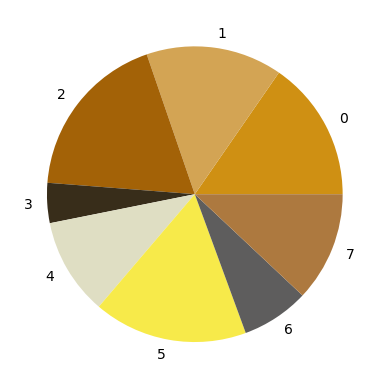

In [6]:
drawpie(labels,centers)

In [ ]:
import cv2
import numpy as np

# Chargement de l'image en couleur
img = cv2.imread('training/im-002_im.png')

# Conversion de l'image en niveau de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer une opération de seuillage pour convertir l'image en binaire
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Appliquer une opération de fermeture pour éliminer les petits éléments
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Identifier les régions connexes dans l'image binaire
output = cv2.connectedComponentsWithStats(closing, 4, cv2.CV_32S)

# Nombre minimum de pixels pour considérer une région comme intéressante
min_pixels = 100

# Parcourir les régions étiquetées et compter le nombre de pixels dans chaque région
for i in range(output[0]):
    # Ignorer la région d'arrière-plan
    if i == 0:
        continue
    # Calculer le nombre de pixels dans la région avec une intensité supérieure à 200
    num_pixels = np.sum(gray[output[1] == i] >= 200)
    # Si le nombre de pixels est suffisant, afficher la région sur l'image d'origine
    if num_pixels >= min_pixels:
        img[output[1] == i] = (0, 255, 0)

# Afficher l'image résultante
cv2.imshow('image avec zones intéressantes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
import cv2
import numpy as np

# Chargement de l'image en couleur
img = cv2.imread('training/im-002_im.png')

# Conversion de l'image en niveau de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer une opération de seuillage pour convertir l'image en binaire
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Appliquer une opération de fermeture pour éliminer les petits éléments
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Identifier les régions connexes dans l'image binaire
output = cv2.connectedComponentsWithStats(closing, 4, cv2.CV_32S)

# Nombre minimum de pixels pour considérer une région comme intéressante
min_pixels = 100

# Parcourir les régions étiquetées et compter le nombre de pixels dans chaque région
for i in range(output[0]):
    # Ignorer la région d'arrière-plan
    if i == 0:
        continue
    # Calculer le nombre de pixels dans la région avec une intensité supérieure à 200
    num_pixels = np.sum(gray[output[1] == i] >= 200)
    # Si le nombre de pixels est suffisant, afficher la région sur l'image d'origine
    if num_pixels >= min_pixels:
        img[output[1] == i] = (0, 255, 0)

# Afficher l'image résultante
# cv2.imshow('image avec zones intéressantes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [15]:

pixel_vals = img.reshape((-1,3))
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

 

 

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 3 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 20, cv2.KMEANS_RANDOM_CENTERS)


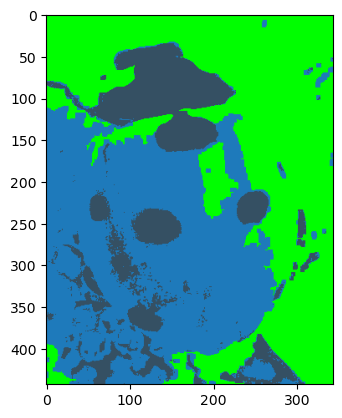

In [16]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((img.shape)) # reshape data into the original image dimensions
plt.imshow(segmented_image)

In [10]:
drawpie(labels,centers)

NameError: name 'drawpie' is not defined

In [8]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('training/im-002_im.png')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# -----------------
# Define the range of blue color to amplify
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])


# Create a mask for the blue color range
mask = cv2.inRange(hsv, lower_blue, upper_blue)


# -----------------

# Define the range of red color to amplify
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Create a mask for the red color range
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red = np.array([170, 50, 50])
upper_red = np.array([180, 255, 255])

mask2 = cv2.inRange(hsv, lower_red, upper_red)

# Combine the red masks
mask_red = mask1 + mask2


# -----------------
# Define the range of black color to amplify
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 40])

# Create a mask for the black color range
mask_black = cv2.inRange(hsv, lower_black, upper_black)




# -----------------
# Define the range of orange color to amplify
lower_orange = np.array([10, 50, 50])
upper_orange = np.array([25, 255, 255])

# Create a mask for the orange color range
mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)


# -----------------

# Apply a contrast enhancement operation to the blue color range
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
blue_range = hsv[:, :, 2]
blue_mask = mask != 0
enhanced_blue_range = clahe.apply(blue_range[blue_mask])
enhanced_blue_range = enhanced_blue_range.reshape(blue_range[blue_mask].shape)

# Update the intensity channel of the HSV image with the enhanced blue range
blue_range[blue_mask] = enhanced_blue_range
hsv[:, :, 2] = blue_range

# Convert the image back to the BGR color space
result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [9]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('training/im-002_im.png')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# -----------------
# Define the range of red color to amplify
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Create a mask for the red color range
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red = np.array([170, 50, 50])
upper_red = np.array([180, 255, 255])

mask2 = cv2.inRange(hsv, lower_red, upper_red)

# Combine the red masks
mask_red = mask1 + mask2

# -----------------
# Define the range of orange color to amplify
lower_orange = np.array([10, 50, 50])
upper_orange = np.array([25, 255, 255])

# Create a mask for the orange color range
mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)

# -----------------
# Define the range of black color to amplify
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 40])

# Create a mask for the black color range
mask_black = cv2.inRange(hsv, lower_black, upper_black)

# -----------------

# Apply a contrast enhancement operation to the red color range
clahe_red = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
red_range = hsv[:, :, 2]
red_mask = mask_red != 0
enhanced_red_range = clahe_red.apply(red_range[red_mask])
enhanced_red_range = enhanced_red_range.reshape(red_range[red_mask].shape)

# Update the intensity channel of the HSV image with the enhanced red range
red_range[red_mask] = enhanced_red_range
hsv[:, :, 2] = red_range

# -----------------

# Apply a contrast enhancement operation to the orange color range
clahe_orange = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
orange_range = hsv[:, :, 2]
orange_mask = mask_orange != 0
enhanced_orange_range = clahe_orange.apply(orange_range[orange_mask])
enhanced_orange_range = enhanced_orange_range.reshape(orange_range[orange_mask].shape)

# Update the intensity channel of the HSV image with the enhanced orange range
orange_range[orange_mask] = enhanced_orange_range
hsv[:, :, 2] = orange_range

# -----------------

# Apply a contrast enhancement operation to the black color range
clahe_black = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
black_range = hsv[:, :, 2]
black_mask = mask_black != 0
enhanced_black_range = clahe_black.apply(black_range[black_mask])
enhanced_black_range = enhanced_black_range.reshape(black_range[black_mask].shape)

# Update the intensity channel of the HSV image with the enhanced black range
black_range[black_mask] = enhanced_black_range
hsv[:, :, 2] = black_range

# -----------------

# Convert the image back to the BGR color space
result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

